## Verisetinin İndirilmesi ve Dosyaların Çıkarılması

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
%cd '/gdrive/My Drive/DeepLearningBootcamp'

/gdrive/My Drive/DeepLearningBootcamp


In [ ]:
!ls

1-SoundsClassification_Preprocess.ipynb  X_train.pkl
2-SoundsClassification_Train.ipynb	 X_val.pkl
errors.txt				 y_test.pkl
spectroGrams				 y_train.pkl
spectrograms-20221001T190226Z-001.zip	 y_val.pkl
X_test.pkl


In [5]:
import pickle

In [6]:
# Kaydedilen dosyalar kullanabilmek icin load edilmistir.
X_train = pickle.load(open('X_train.pkl', 'rb'))
y_train = pickle.load(open('y_train.pkl', 'rb'))

X_val = pickle.load(open('X_val.pkl', 'rb'))
y_val = pickle.load(open('y_val.pkl', 'rb'))

X_test = pickle.load(open('X_test.pkl', 'rb'))
y_test = pickle.load(open('y_test.pkl', 'rb'))

In [ ]:
X_test

array([[[1.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [1.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [1.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [1.        , 0.23137255, 0.68627451, ..., 0.6745098 ,
         0.6745098 , 0.6745098 ],
        [1.        , 0.10588235, 0.10980392, ..., 0.10980392,
         0.10980392, 0.10980392],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[1.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [1.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [1.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [1.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [1. 

In [ ]:
y_test

array([1, 3, 4, 7, 3, 8, 0, 1, 0, 5, 0, 7, 8, 8, 1, 3, 7, 8, 4, 7, 7, 3,
       8, 0, 7, 0, 4, 7, 2, 0, 3, 9, 2, 2, 0, 5, 0, 2, 5, 4, 9, 7, 8, 2,
       0, 9, 9, 4, 6, 0, 8, 4, 3, 4, 5, 7, 2, 8, 5, 9, 8, 2, 7, 7, 3, 8,
       7, 7, 7, 8, 8, 2, 2, 2, 8, 8, 0, 5, 5, 3, 7, 9, 9, 5, 0, 8, 5, 7,
       5, 2, 9, 2, 9, 7, 7, 8, 6, 4, 3, 5, 8, 9, 8, 6, 4, 3, 5, 6, 3, 7,
       5, 5, 4, 9, 4, 6, 8, 2, 7, 7, 9, 9, 9, 7, 8, 3, 8, 7, 0, 4, 1, 2,
       2, 0, 9, 2, 0, 8, 2, 5, 1, 2, 4, 3, 8, 3, 9, 8, 3, 8, 9, 7, 0, 6,
       8, 1, 9, 5, 3, 0, 7, 4, 2, 0, 7, 1, 3, 9, 0, 5, 4, 2, 4, 5, 5, 3,
       3, 0, 3, 7, 7, 2, 0, 6, 7, 7, 7, 2, 0, 3, 9, 9, 8, 9, 5, 4, 9, 3,
       3, 3, 8, 4, 5, 0, 3, 4, 0, 9, 5, 9, 9, 9, 7, 5, 9, 5, 4, 5, 7, 7,
       5, 7, 5, 5, 0, 7, 5, 4, 9, 2, 7, 0, 0, 2, 3, 0, 5, 9, 5, 1, 9, 5,
       3, 3, 7, 0, 8, 3, 7, 1, 5, 5, 4, 3, 0, 7, 3, 0, 1, 5, 3, 8, 7, 2,
       3, 0, 4, 1, 8, 1, 4, 9, 2, 0, 0, 3, 1, 4, 7, 7, 1, 9, 4, 7, 5, 9,
       2, 5, 6, 3, 2, 4, 0, 5, 3, 3, 6, 3, 7, 0, 2,

In [ ]:
X_train.shape, y_train.shape

((6986, 128, 128), (6986,))

#### Label Sayisi

In [7]:
import numpy as np

In [8]:
# CNN modeli kurarken kategori sayisina ihtiyacimiz var. Asagidaki islem bunun icin yapilmistir.
labels, _ = np.unique(y_test, return_inverse=True)
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
num_of_labels = len(labels)
num_of_labels

10

## Gerekli Kütüphanelerin Yüklenmesi

In [27]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
y_train.shape, y_val.shape, X_train.shape, X_val.shape

((6986,), (873,), (6986, 128, 128), (873, 128, 128))

-----------------------------------------------------

## Birinci model

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape = (128,128,1), filters = 8, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units = 256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(units = num_of_labels))
model.add(Activation("softmax"))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train
hist = model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs= 25, batch_size= 16)

Epoch 1/25
437/437 [==============================] - 74s 168ms/step - loss: 1.7175 - accuracy: 0.4024 - val_loss: 1.8148 - val_accuracy: 0.3047
Epoch 2/25
437/437 [==============================] - 72s 165ms/step - loss: 1.2773 - accuracy: 0.5598 - val_loss: 1.0237 - val_accuracy: 0.6667
Epoch 3/25
437/437 [==============================] - 71s 163ms/step - loss: 1.0311 - accuracy: 0.6424 - val_loss: 0.8699 - val_accuracy: 0.7171
Epoch 4/25
437/437 [==============================] - 72s 166ms/step - loss: 0.8911 - accuracy: 0.6944 - val_loss: 0.7320 - val_accuracy: 0.7583
Epoch 5/25
437/437 [==============================] - 74s 169ms/step - loss: 0.7843 - accuracy: 0.7315 - val_loss: 0.7663 - val_accuracy: 0.7423
Epoch 6/25
437/437 [==============================] - 74s 170ms/step - loss: 0.6929 - accuracy: 0.7667 - val_loss: 0.6118 - val_accuracy: 0.7995
Epoch 7/25
437/437 [==============================] - 74s 169ms/step - loss: 0.6354 - accuracy: 0.7839 - val_loss: 0.6102 - val_ac

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 3s 92ms/step - loss: 0.3527 - accuracy: 0.8935


[0.35266703367233276, 0.8934707641601562]

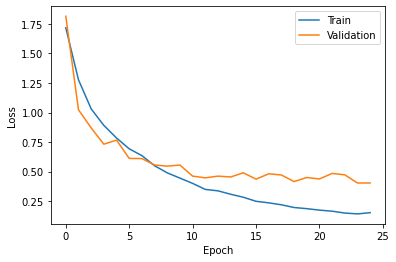

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Train")
plt.plot(hist.history["val_loss"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

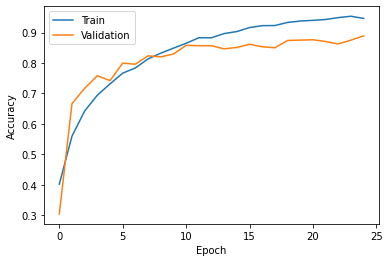

In [ ]:
plt.plot(hist.history["accuracy"], label="Train")
plt.plot(hist.history["val_accuracy"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.save("trained_model_0.h5")

-----------------------------------------------------

## Ikinci Model

Yukaridaki modelden farkli olarak CNNdeki filtreler ile oynanmistir.

Dropout kisminda 0.2 olarak degistirilmistir.

'learning_rate= 0.001' yani daha buyuk bir sayi verilmistir.

Batch size de 32ye yukseltilmistir.

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape = (128,128,1), filters = 16, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 128, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units = 256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(units = num_of_labels))
model.add(Activation("softmax"))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train
hist = model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs= 25, batch_size= 32)

Epoch 1/25
219/219 [==============================] - 150s 680ms/step - loss: 2.7298 - accuracy: 0.3971 - val_loss: 3.6524 - val_accuracy: 0.1249
Epoch 2/25
219/219 [==============================] - 148s 676ms/step - loss: 1.3586 - accuracy: 0.5139 - val_loss: 2.4014 - val_accuracy: 0.2864
Epoch 3/25
219/219 [==============================] - 157s 716ms/step - loss: 1.1631 - accuracy: 0.5853 - val_loss: 1.2630 - val_accuracy: 0.5808
Epoch 4/25
219/219 [==============================] - 148s 677ms/step - loss: 1.0092 - accuracy: 0.6427 - val_loss: 0.9383 - val_accuracy: 0.6976
Epoch 5/25
219/219 [==============================] - 148s 674ms/step - loss: 0.8824 - accuracy: 0.6828 - val_loss: 0.8998 - val_accuracy: 0.6942
Epoch 6/25
219/219 [==============================] - 147s 673ms/step - loss: 0.7972 - accuracy: 0.7170 - val_loss: 0.7394 - val_accuracy: 0.7629
Epoch 7/25
219/219 [==============================] - 146s 667ms/step - loss: 0.7137 - accuracy: 0.7491 - val_loss: 0.8182 -

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 5s 182ms/step - loss: 0.5211 - accuracy: 0.8889


[0.5210739970207214, 0.8888888955116272]

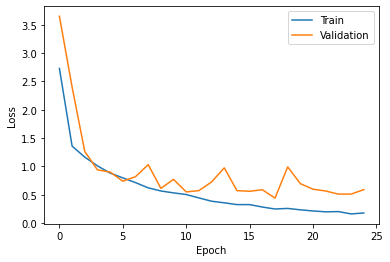

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Train")
plt.plot(hist.history["val_loss"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

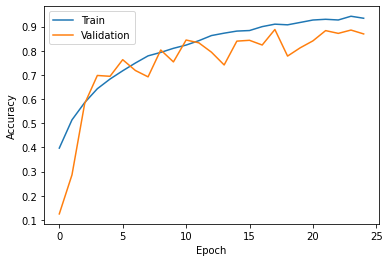

In [ ]:
plt.plot(hist.history["accuracy"], label="Train")
plt.plot(hist.history["val_accuracy"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.save("trained_model_1.h5")

------------------------------------------------------------------------------

## Ucuncu Model

Burada sadece epoch sayisi degistirilmistir.

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape = (128, 128,1), filters = 16, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 128, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units = 256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(units = num_of_labels))
model.add(Activation("softmax"))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train
hist = model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs= 50, batch_size= 32)

Epoch 1/50
219/219 [==============================] - 144s 647ms/step - loss: 3.3838 - accuracy: 0.4092 - val_loss: 5.0029 - val_accuracy: 0.0332
Epoch 2/50
219/219 [==============================] - 138s 628ms/step - loss: 1.2782 - accuracy: 0.5601 - val_loss: 4.5840 - val_accuracy: 0.1145
Epoch 3/50
219/219 [==============================] - 138s 629ms/step - loss: 1.0358 - accuracy: 0.6411 - val_loss: 2.1399 - val_accuracy: 0.4536
Epoch 4/50
219/219 [==============================] - 137s 628ms/step - loss: 0.9371 - accuracy: 0.6721 - val_loss: 1.6321 - val_accuracy: 0.5521
Epoch 5/50
219/219 [==============================] - 136s 623ms/step - loss: 0.8194 - accuracy: 0.7183 - val_loss: 0.9610 - val_accuracy: 0.6919
Epoch 6/50
219/219 [==============================] - 136s 622ms/step - loss: 0.7100 - accuracy: 0.7521 - val_loss: 1.6953 - val_accuracy: 0.5796
Epoch 7/50
219/219 [==============================] - 138s 631ms/step - loss: 0.6267 - accuracy: 0.7801 - val_loss: 0.6882 -

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 4s 157ms/step - loss: 0.3685 - accuracy: 0.9175


[0.36845651268959045, 0.9175257682800293]

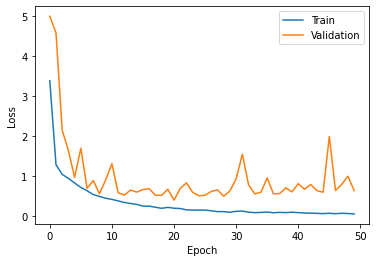

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Train")
plt.plot(hist.history["val_loss"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

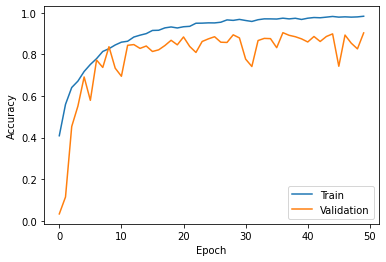

In [ ]:
plt.plot(hist.history["accuracy"], label="Train")
plt.plot(hist.history["val_accuracy"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.save("trained_model_2.h5")

------------------------------------------------------------------------------

### Degerlendirme

En iyi Accuracy degeri 3. modelde elde edilmistir.

En iyi loss degeri (En dusuk) 1. modelde elde edilmistir.